In [12]:
import pandas as pd

In [16]:
%run -i '/Users/UCRP556/code/DL/DeepLearning/performance/metrics.py'

     id  label     score  precision    recall       FPR
0   929      1  0.000016   1.000000  0.000671  0.000000
1  2134      1  0.000057   1.000000  0.001341  0.000000
2   103      1  0.000826   1.000000  0.002012  0.000000
3  2072      1  0.001112   1.000000  0.002683  0.000000
4  2066      1  0.002002   1.000000  0.003353  0.000000
5   250      0  0.002270   0.833333  0.003353  0.000663
6  2745      1  0.002498   0.857143  0.004024  0.000663
7   837      0  0.002983   0.750000  0.004024  0.001325
8  2414      0  0.003235   0.666667  0.004024  0.001988
9    77      0  0.003913   0.600000  0.004024  0.002651


.EE
ERROR: testBRUL (__main__.TestMetrics)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/UCRP556/code/DL/DeepLearning/performance/metrics.py", line 404, in testBRUL
    df = pd.read_csv(filename)
  File "/Users/UCRP556/code/DL/dlenv/lib/python3.7/site-packages/pandas/io/parsers.py", line 702, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/UCRP556/code/DL/dlenv/lib/python3.7/site-packages/pandas/io/parsers.py", line 429, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/UCRP556/code/DL/dlenv/lib/python3.7/site-packages/pandas/io/parsers.py", line 895, in __init__
    self._make_engine(self.engine)
  File "/Users/UCRP556/code/DL/dlenv/lib/python3.7/site-packages/pandas/io/parsers.py", line 1122, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/UCRP556/code/DL/dlenv/lib/python3.7/site-packages/pandas/io/parsers.py", line 18

SystemExit: True

In [30]:
DATA_DIR = '/Users/UCRP556/data/aviation/NASA/Challenge_Data/'
FIG_DIR = '/Users/UCRP556/data/aviation/NASA/Challenge_Data/figures/'

# Purpose
The purpose of this R&D project is to analyze the influence of the loss function in a machine learning algorithms for predictive maintenance.
The algorithms will use time series of parameters as inputs and predict the remaining useful life (RUL) as target variable.

The RUL score and loss function are shown below. The RUL score is performance metric for RUL models and was published in [https://ieeexplore.ieee.org/document/4711422]. The loss function is similarly designed as the RUL scoring function, but with higher penalization. The aim is to design a loss function that is able to better train the DNN.

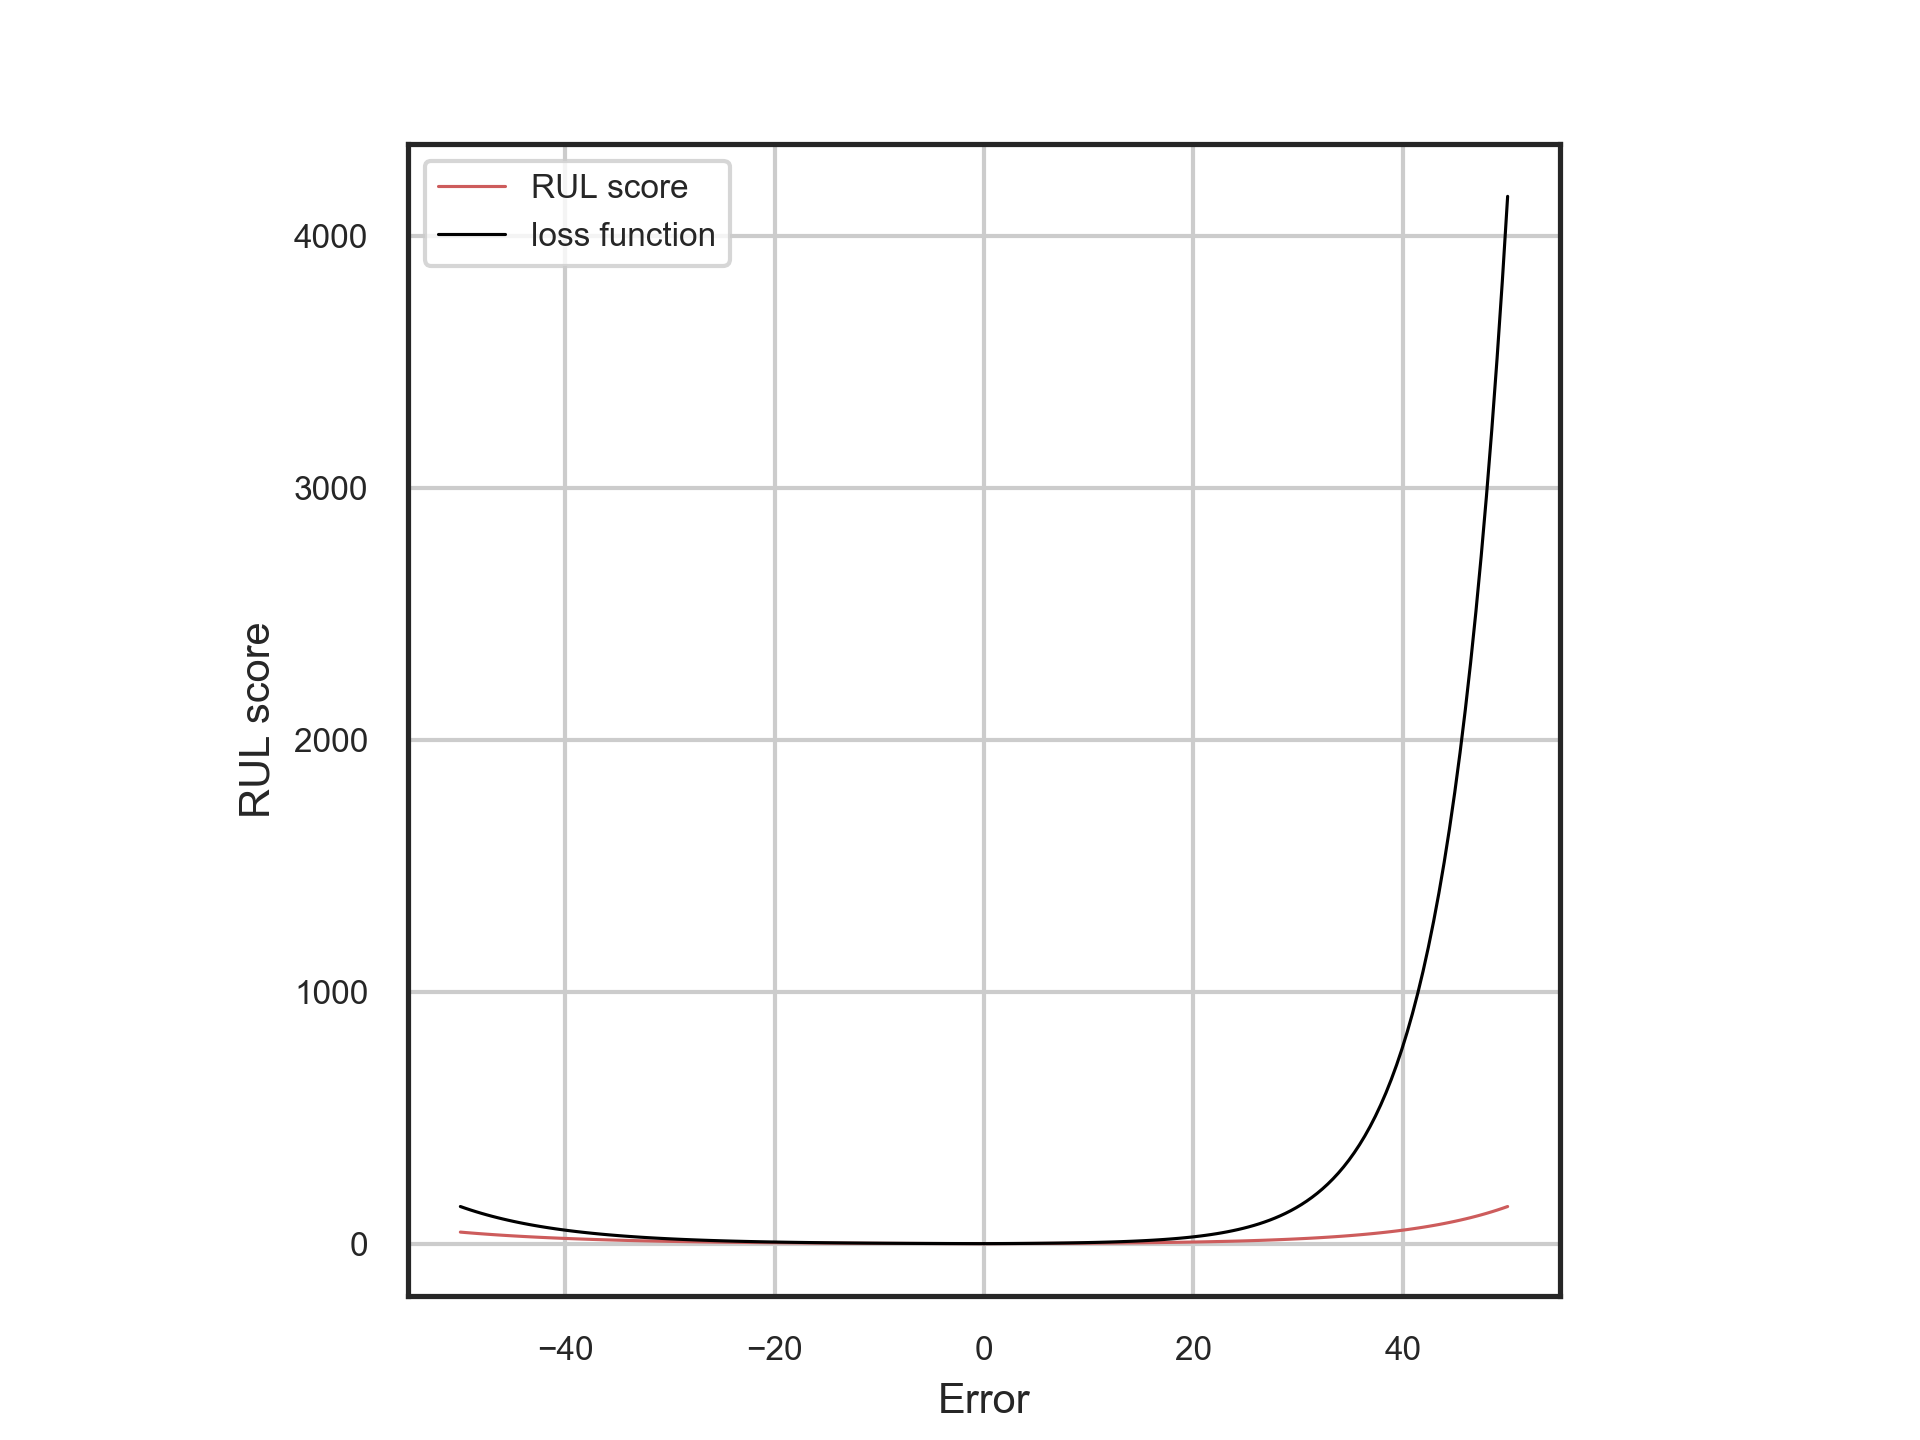

In [20]:
name='present'
metric = Metrics()
metric.plot_loss_function(name=name)
del metric

from IPython.display import Image
Image(filename=FIG_DIR+name+'_loss_function.png') 

# Multilayer Perceptron

The first deep neural network model is a multilayer perceptron for predicting the remaining useful life (RUL). Two loss functions will be compared: (1) the mean absolute percentage error and (2) a customized loss function with a higher penalization of RUL predictions after the failure.

## Mean absolute percentage error

The mean absolute percentage error is used to train the DNN. The performance evaluation illustrated how residuals (on figures called $Error = (y_{hat} - y$))

In [21]:
name = 'MLP_NASA_Challenge_RUL'

filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

FileNotFoundError: [Errno 2] File b'/Users/UCRP556/data/aviation/NASA/Challenge_Data/model/MLP_NASA_Challenge_RUL_y_test.csv' does not exist: b'/Users/UCRP556/data/aviation/NASA/Challenge_Data/model/MLP_NASA_Challenge_RUL_y_test.csv'

In [ ]:
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
history = DATA_DIR+'model/'+name+'_history.pkl'
print(history)
metric.plot_learning(name=name)
del metric

In [ ]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'.png') 

In [ ]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'_learning.png')

The DNN model performs worse when RUL values are low. The most important drawback of the model is that the RUL as predicted after their occurance ($Errors > zero$).

The learning curve shows a normal learning episode.

## Customized RUL loss
### $a_1 = 10$ and $a_2 = 6$

A customized loss function can be used to train the DNN for regression. 

In [ ]:
name = 'MLP_NASA_Challenge_RUL_loss_a_10_6'
DATA_DIR = '/home/laptop/Documents/data/aviation/NASA/Challenge_Data/'
filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

In [ ]:
FIG_DIR = "/home/laptop/Documents/data/aviation/NASA/Challenge_Data/figures/"
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
history = DATA_DIR+'model/'+name+'_history.pkl'
print(history)
metric.plot_learning(name=name)
del metric

In [ ]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'.png')

In [ ]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'_learning.png')

The DNN model performs worse when RUL values are low. The most important drawback of the model is that the RUL as predicted after their occurance ($Errors > zero$).

Customizing the loss function did not result in a big performance boost. The overal performance of the model showed a modest increase. But, no increase in performance for low RUL values.

The learning curve shows a normal learning episode.

### $a_1 = 8$ and $a_2 = 5$

In [32]:
name = 'MLP_NASA_Challenge_RUL_loss_a_8_5'
filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

(29820, 2)


,y,y_hat
29819,0.0,27.766570
29818,1.0,27.557518
29817,2.0,27.474672
29816,3.0,28.860888
29815,4.0,29.649614


/Users/UCRP556/data/aviation/NASA/Challenge_Data/model/MLP_NASA_Challenge_RUL_loss_a_8_5_history.pkl


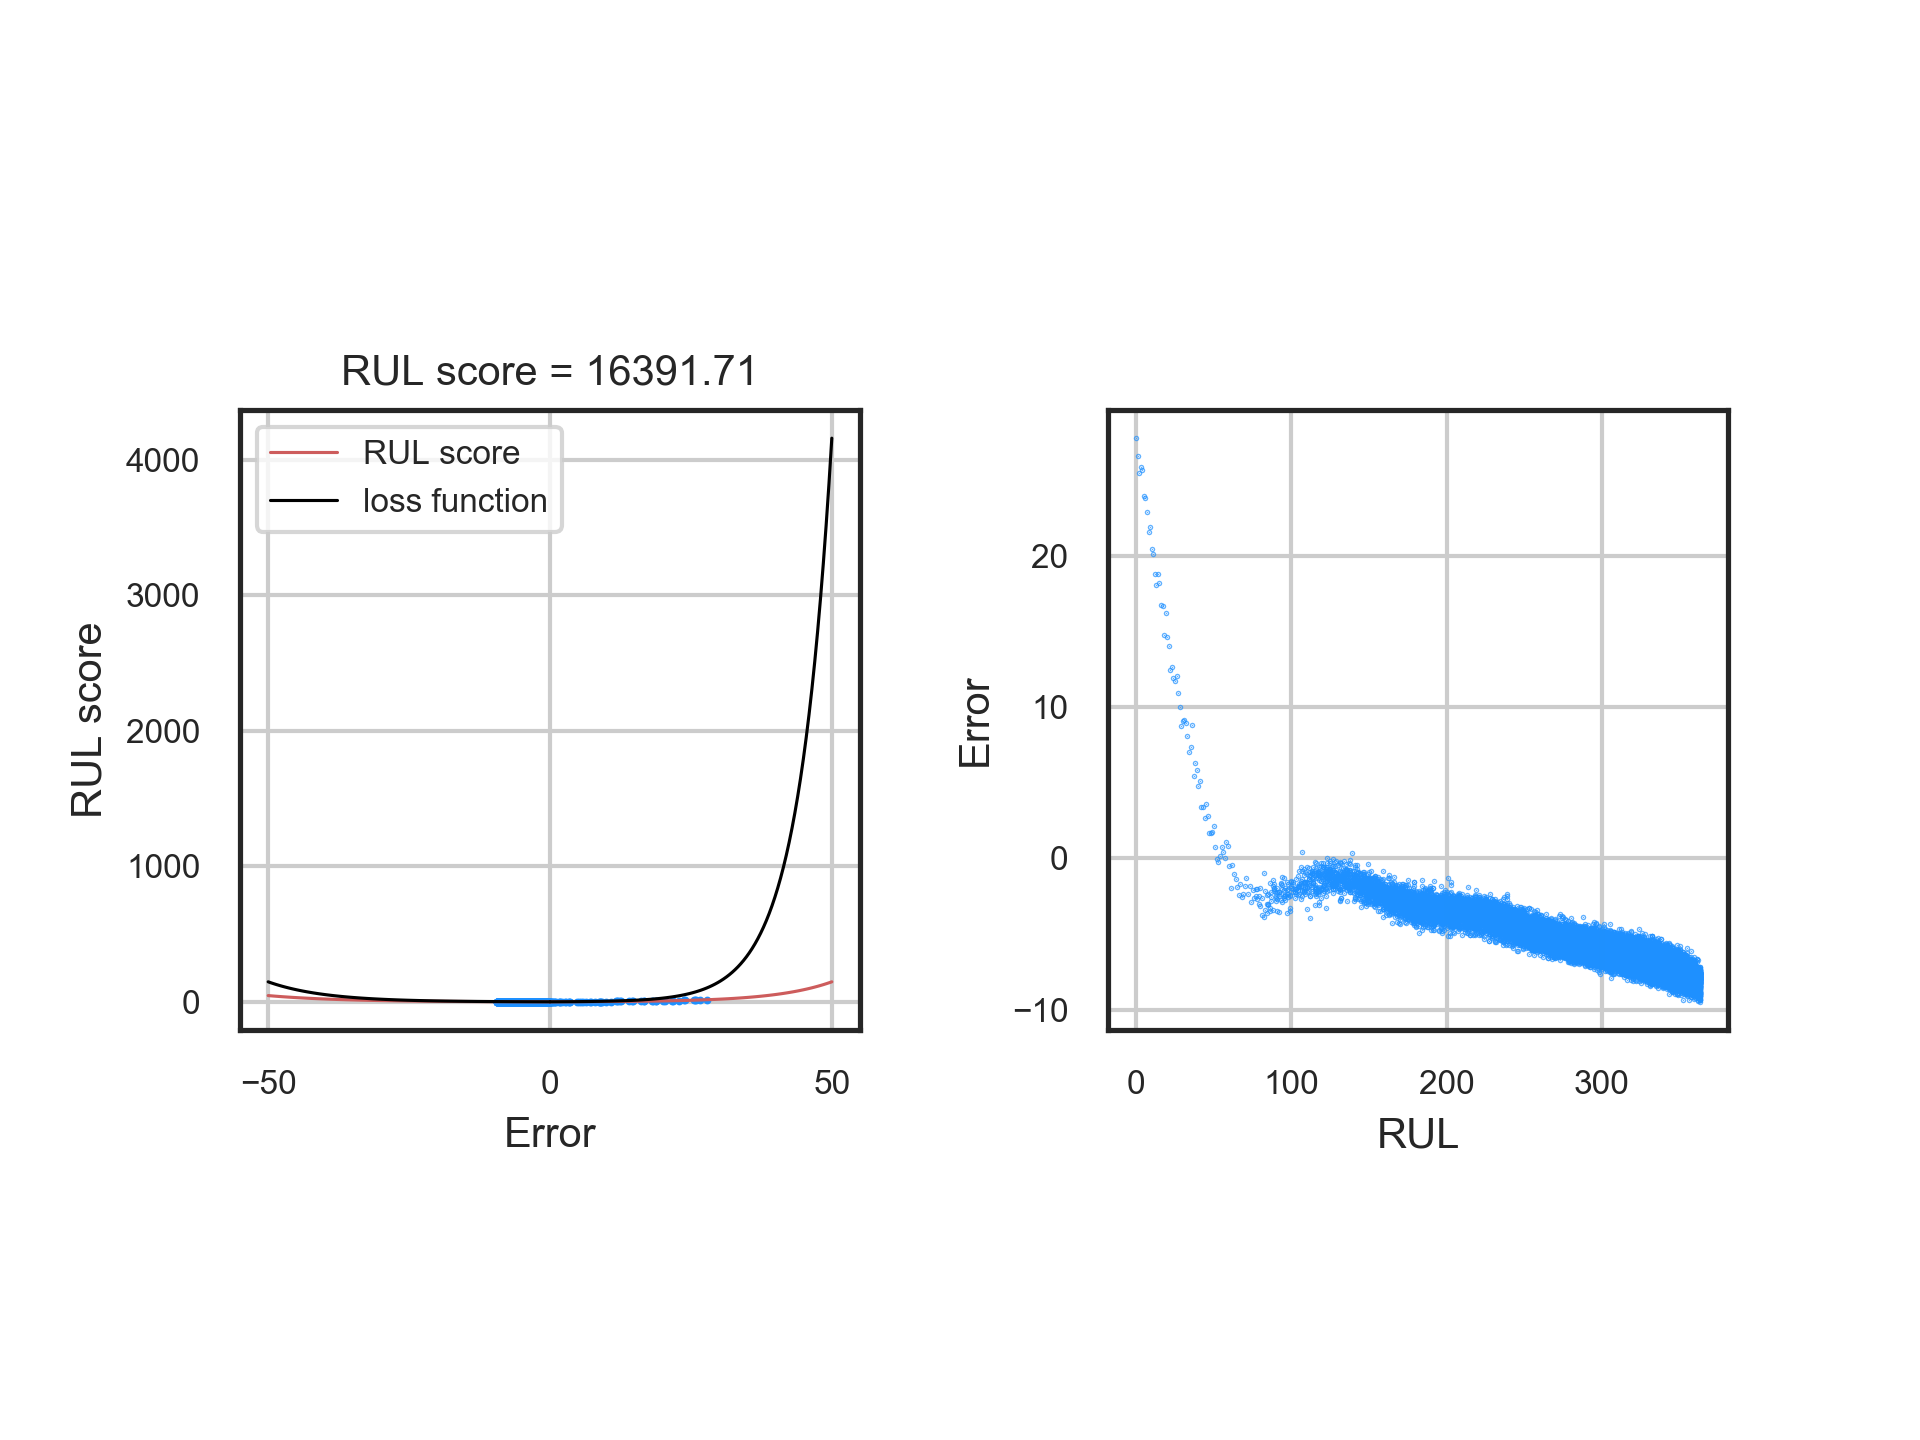

In [34]:
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
history = DATA_DIR+'model/'+name+'_history.pkl'
print(history)
metric.plot_learning(name=name)
del metric

from IPython.display import Image
Image(filename=FIG_DIR+name+'.png')

# Recurrent neural network


## Mean absolute percentage error

In [28]:
name = 'RNN_NASA_Challenge_RUL'
DATA_DIR = '/home/laptop/Documents/data/aviation/NASA/Challenge_Data/'
filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

FileNotFoundError: [Errno 2] File b'/home/laptop/Documents/data/aviation/NASA/Challenge_Data/model/RNN_NASA_Challenge_RUL_y_test.csv' does not exist: b'/home/laptop/Documents/data/aviation/NASA/Challenge_Data/model/RNN_NASA_Challenge_RUL_y_test.csv'

In [ ]:
FIG_DIR = "/home/laptop/Documents/data/aviation/NASA/Challenge_Data/figures/"
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
#history = DATA_DIR+'model/'+name+'_history.pkl'
#print(history)
#metric.plot_learning(name=name)
del metric

In [ ]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'.png')

In [ ]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'_learning.png')

## Customized RUL loss

In [ ]:
name = 'RNN_NASA_Challenge_RUL_loss_a_10_6_exp'
DATA_DIR = '/home/laptop/Documents/data/aviation/NASA/Challenge_Data/'
filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

In [ ]:
FIG_DIR = "/home/laptop/Documents/data/aviation/NASA/Challenge_Data/figures/"
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
history = DATA_DIR+'model/'+name+'_history.pkl'
print(history)
metric.plot_learning(name=name)
del metric

In [ ]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'.png')

In [ ]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'_learning.png')